In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

In [98]:
boston = datasets.load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [99]:
print (boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [100]:
# check for missing values in all the columns
boston.isnull().sum()

AttributeError: isnull

In [41]:
df_boston = pd.DataFrame(boston['data'])
df_boston.columns = boston[('feature_names')]
df_boston['Price'] = boston['target']
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


C:\Users\Patghadban\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


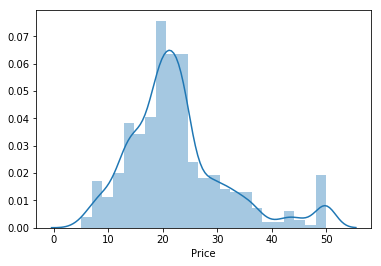

In [42]:
sns.distplot(df_boston['Price'])

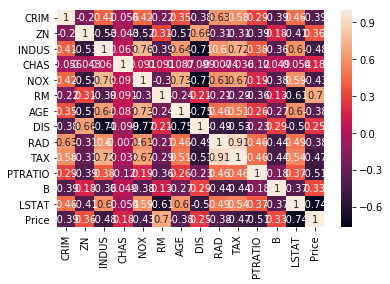

In [43]:
sns.heatmap(df_boston.corr(), annot=True)

In [44]:
df_boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')

In [45]:
# Set X, y values and split the data

# X = bos[[u'RM', u'LSTAT']]
X = df_boston[[u'CRIM', u'ZN', u'INDUS', u'CHAS', u'NOX', u'RM', u'AGE', u'DIS',
       u'RAD', u'TAX', u'PTRATIO', u'B', u'LSTAT']]
y = df_boston["Price"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=200)
print("X_train shape -> {}".format(X_train.shape))
print("y_train shape -> {}".format(y_train.shape))
print("X_test shape -> {}".format(X_test.shape))
print("y_test shape -> {}".format(y_test.shape))

X_train shape -> (404, 13)
y_train shape -> (404,)
X_test shape -> (102, 13)
y_test shape -> (102,)


In [47]:
#Fit the model and predict

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
predictions = linear_model.predict(X_test)

In [52]:
print("MAE: ", metrics.mean_absolute_error(y_test, predictions))
print("MSE: ", metrics.mean_squared_error(y_test, predictions))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE:  3.8575090114333874
MSE:  34.95904120477933
RMSE:  5.912617119751569


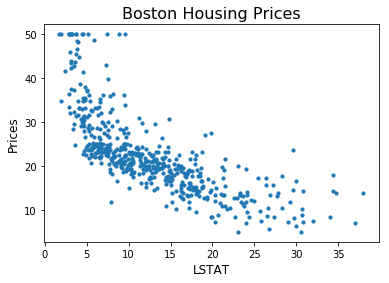

In [92]:
# Display Predictions
X = df_boston[["LSTAT"]]
y = df_boston["Price"]


plt.scatter(X, y, s=10)
plt.title("Boston Housing Prices", fontsize=16)
plt.xlabel("LSTAT", fontsize=12)
plt.ylabel("Prices", fontsize=12)
plt.show()

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
poly_features = PolynomialFeatures(degree = 2)

# Transform the features to higher degree features
X_train_poly = poly_features.fit_transform(X_train)

# Fit the transformed features to training data
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Predicting on the training data
train_predictions = poly_model.predict(X_train_poly)

# Predicting on the test data
test_predictions = poly_model.predict(poly_features.fit_transform(X_test))

In [94]:
print("MAE: ", metrics.mean_absolute_error(y_test, predictions))
print("MSE: ", metrics.mean_squared_error(y_test, predictions))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE:  9.414747206381787
MSE:  158.56182255257497
RMSE:  12.592133359863013
